In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("input"))

#other libraries
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

['Barley Futures Historical Data.csv', 'Maize Feed Futures Historical Data (1).csv', 'US Wheat Futures Historical Data (4).csv', 'US Wheat Futures Historical Data (5).csv']


In [3]:
df = pd.read_csv("input/Barley Futures Historical Data.csv")

In [4]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df.head(5)

,date,close,open,high,low,vol.,change %,year,month
0,04/28/2023,"2,184.00","2,184.00","2,184.00","2,184.00",NaN,0.18%,2023,4
1,04/27/2023,"2,180.00","2,180.00","2,180.00","2,180.00",NaN,-0.77%,2023,4
2,04/26/2023,"2,197.00","2,197.00","2,197.00","2,197.00",NaN,-0.48%,2023,4
3,04/25/2023,"2,207.50","2,207.50","2,207.50","2,207.50",NaN,-0.27%,2023,4
4,04/24/2023,"2,213.50","2,213.50","2,213.50","2,213.50",NaN,-0.72%,2023,4


In [5]:
df['open'] = df['open'].str.replace(',', '').astype(float)
df['high'] = df['high'].str.replace(',', '').astype(float)
df['low'] = df['low'].str.replace(',', '').astype(float)
df['close'] = df['close'].str.replace(',', '').astype(float)

In [6]:
#Time series data
dfts = df[['date','close']]
dfts['date']=pd.to_datetime(dfts['date'])
dfts=dfts.set_index('date')
dfts = dfts['close'].resample('MS').mean()
dfts

date
2010-01-01    1009.112000
2010-02-01     947.083333
2010-03-01     925.037037
2010-04-01    1013.088000
2010-05-01    1059.840000
                 ...     
2022-12-01    3139.636364
2023-01-01    2698.666667
2023-02-01    2199.275000
2023-03-01    2325.714286
2023-04-01    2189.352941
Freq: MS, Name: close, Length: 160, dtype: float64

In [7]:
dfts = dfts.fillna(method='ffill')

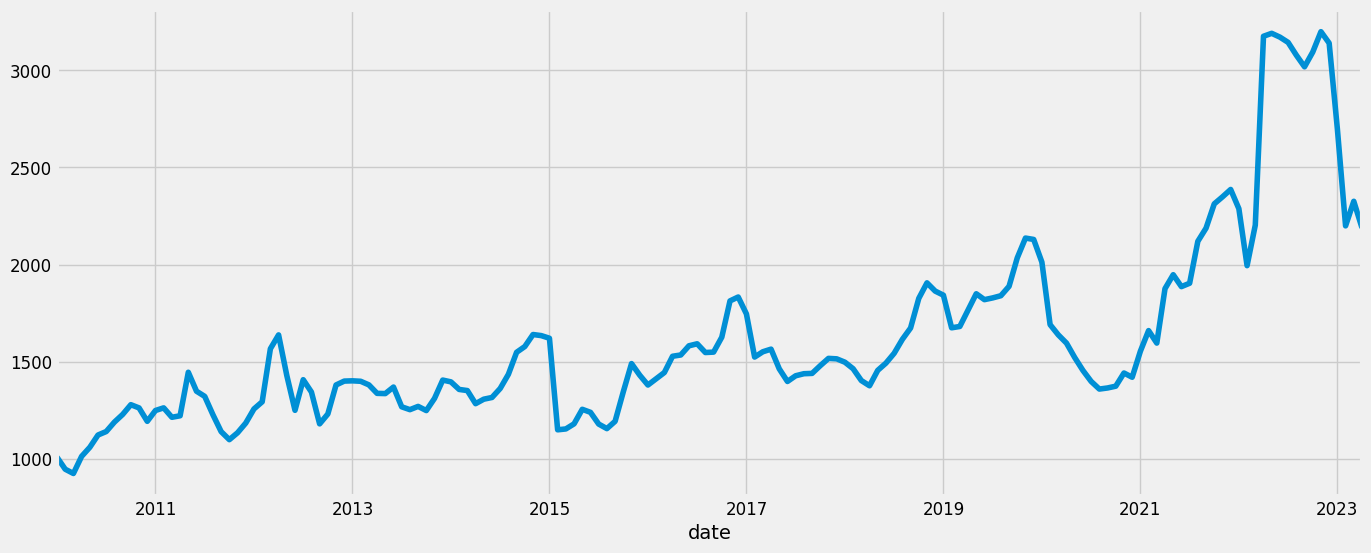

In [8]:
#Visualizing 
dfts.plot(figsize=(15, 6))
plt.show()

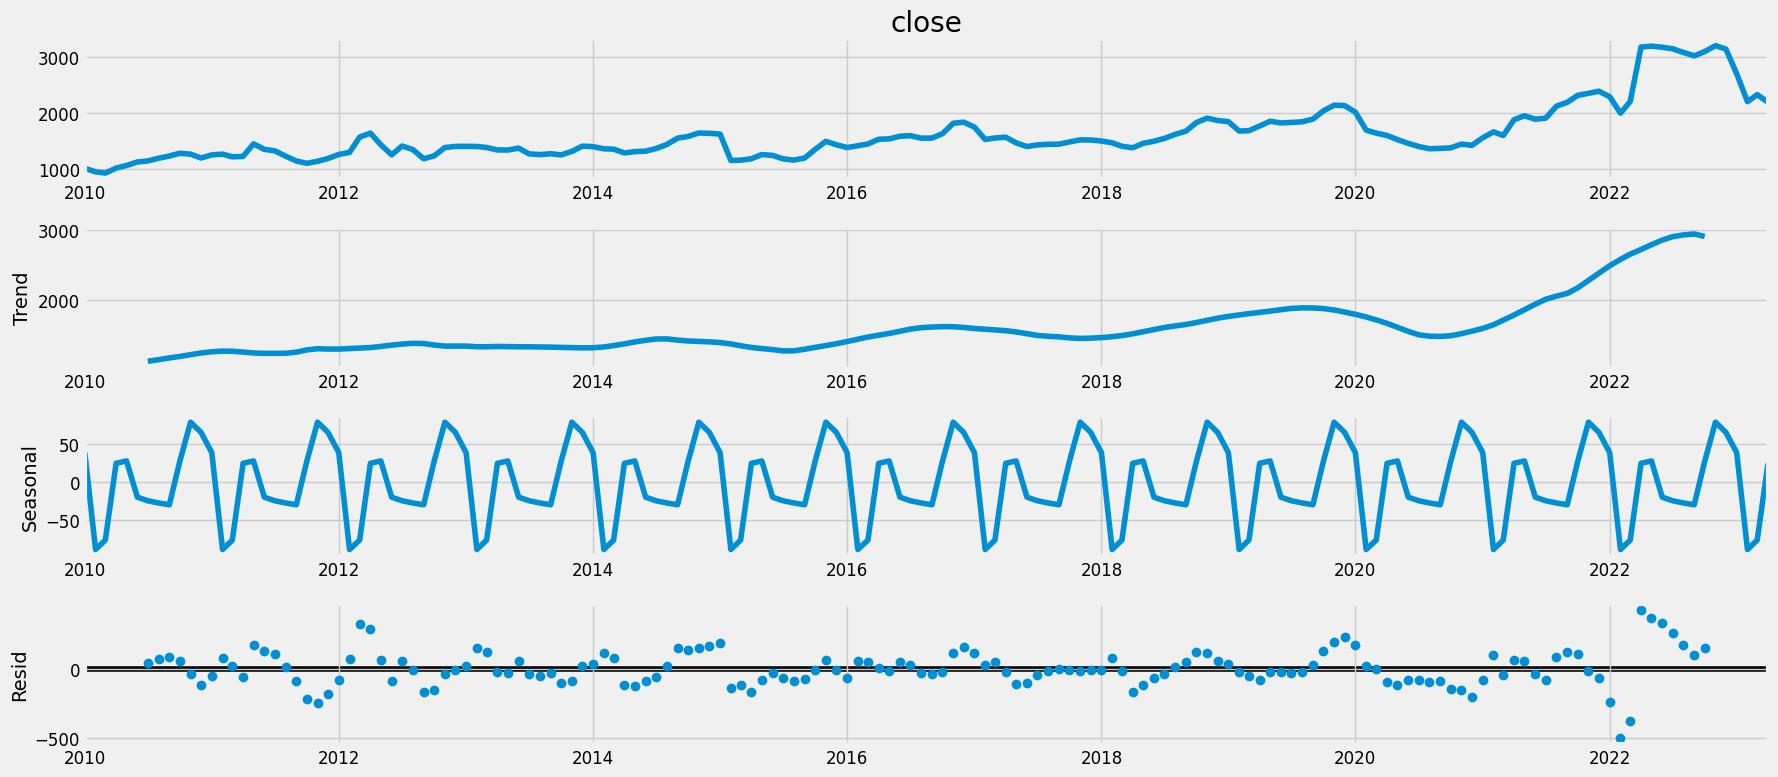

In [9]:
#Time Series Decomposition 
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(dfts, model='additive')
fig = decomposition.plot()
plt.show()

**The plot above clearly shows that wheat prices are unstable, along with its obvious seasonality.**

In [10]:
#ARIMA - checking based on AIC

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dfts,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2816.281648471351
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2458.7954744245635
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2188.766715489447
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2018.8035821894996
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2188.6152498589754
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2140.6704227740925
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2033.5087633116316
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2020.1715660803147
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2597.436851749989
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2263.860433661457
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2033.700623348092
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1868.7687158886965
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2055.6656423500112


c:\Users\Amine\OneDrive - ku.ac.ae\Desktop\Spring2023\ML\ml\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2035.9155511984854
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1898.3119945366182
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1870.727025448086
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2001.0120204078503
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1858.6117856515943
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1926.5630519985305
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1708.7496670435235
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1870.2560378559938
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1860.530153173236
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1751.7171428302418
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1710.1455862898874
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1978.8927913622633
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1838.129440265126
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1907.8843208995677
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1686.541282240535
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1861.6388919875567
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1840.1268686995002
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1745.6910690615

**SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 yields the lowest AIC value of 796. Therefore we should consider this to be optimal option.**

In [11]:
#Fitting ARIMA Model
mod = sm.tsa.statespace.SARIMAX(dfts,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1852      0.418     -0.443      0.658      -1.005       0.635
ma.L1          0.4661      0.406      1.147      0.251      -0.331       1.263
ar.S.L12      -0.5980      0.060     -9.953      0.000      -0.716      -0.480
sigma2      2.317e+04   1347.319     17.200      0.000    2.05e+04    2.58e+04


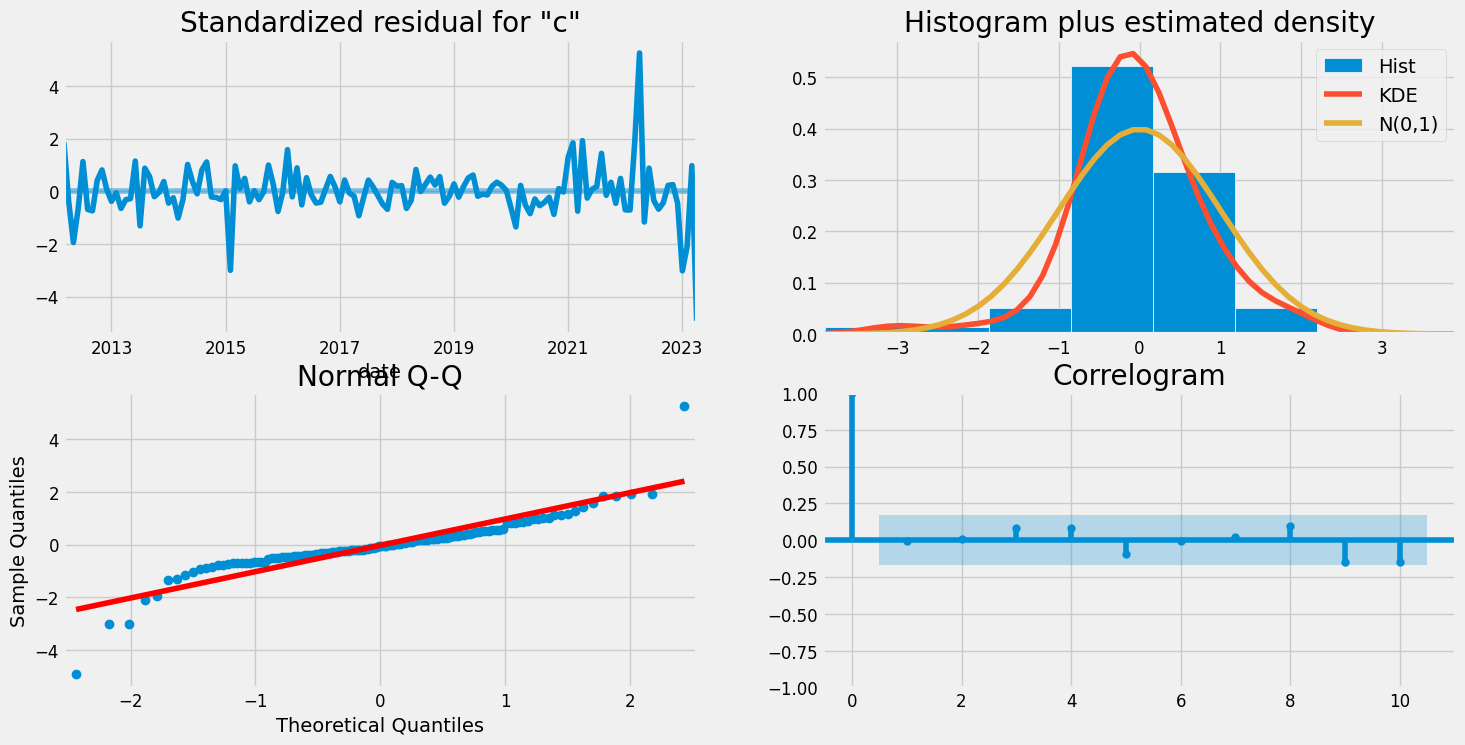

In [12]:
#Model diagnostics
results.plot_diagnostics(figsize=(16, 8))
plt.show()

**model residuals are near normally distributed**

In [33]:
#Real vs Forecast
pred = results.get_prediction(start=pd.to_datetime('2022-06-01'), dynamic=False)


In [204]:
import pickle

# Save the results to a file
with open('barley_predict.pickle', 'wb') as f:
    pickle.dump(results, f)

In [34]:
pred_ci = pred.conf_int()
pred_ci

,lower close,upper close
date,,
2022-06-01,2738.752124,3335.487376
2022-07-01,2899.198673,3495.933925
2022-08-01,2883.029431,3479.764684
2022-09-01,2785.601445,3382.336697
2022-10-01,2761.089793,3357.825045
2022-11-01,2862.247859,3458.983112
2022-12-01,2910.904765,3507.640018
2023-01-01,2860.515419,3457.250671
2023-02-01,2220.530499,2817.265752


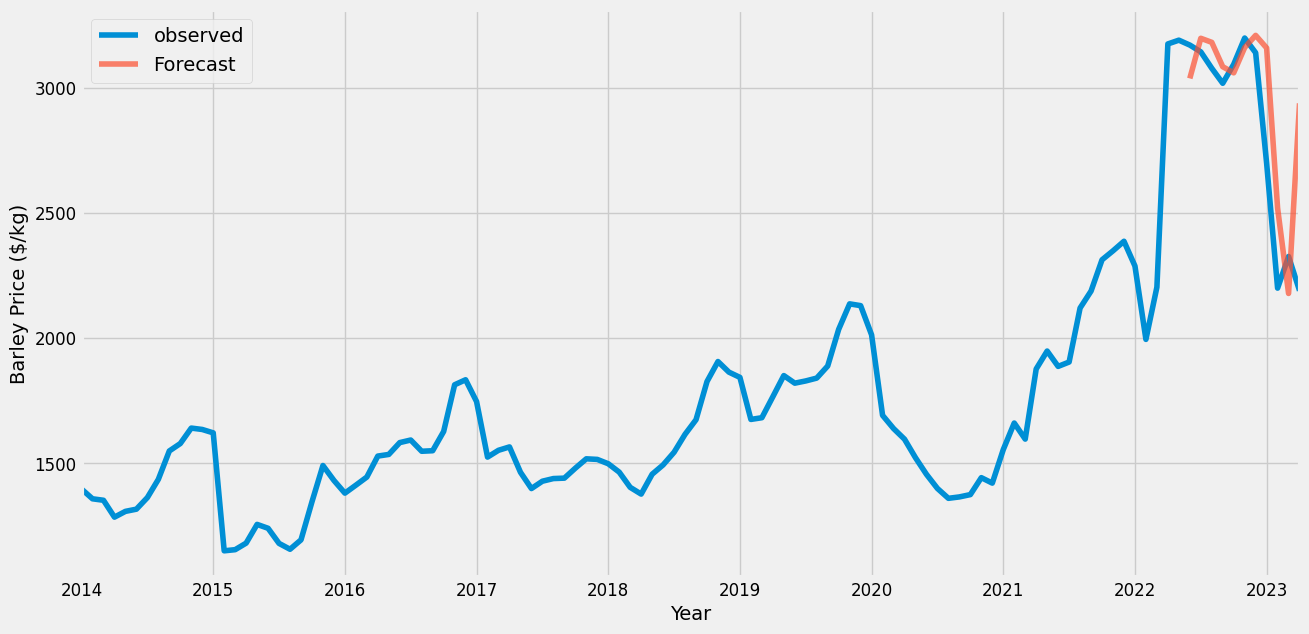

In [38]:
ax = dfts['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Year')
ax.set_ylabel('Barley Price ($/kg)')
plt.legend()
plt.show()

In [207]:
#MSE
y_forecasted = pred.predicted_mean
y_truth = dfts['2022-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 107269.35


**The smaller the MSE, the closer we are to finding the line of best fit**